In [1]:
import xgboost, lightgbm

In [2]:
import keras

Using TensorFlow backend.


In [3]:
!vw --version

8.3.2


In [4]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,sklearn 

CPython 3.5.2
IPython 6.0.0

numpy 1.12.1
scipy 0.19.0
pandas 0.19.2
matplotlib 2.0.0
sklearn 0.18.1

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 3.10.0-327.4.5.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 24
interpreter: 64bit


In [5]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:         128741       24181         746        2401      103812      101711
Swap:          4095          64        4031


In [6]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [7]:
import time
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(100)):
    time.sleep(0.05)

In [8]:
X, Y = datasets.make_classification(10000, 30)
pd.DataFrame(X).head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.418125,-1.698026,1.129392,0.797561,-0.405865,1.092686,-2.236497,1.076786,-1.170878,-0.227062,...,1.253539,0.914955,0.423279,-0.828564,1.189334,0.180483,0.193639,-0.202488,0.953106,-2.058048
1,-0.394011,-1.014804,-2.222188,-0.039969,-1.040244,0.636811,1.549278,-0.639846,1.007302,0.480734,...,-0.969093,-0.095017,1.636345,0.804628,-0.088780,-0.206420,-0.419607,-0.953398,-0.447491,-0.937808
2,-1.298966,0.637269,-0.358119,-1.186362,1.103225,-1.806578,0.921877,-0.933983,-0.619340,1.233368,...,-0.229788,-2.378064,0.587185,0.343949,0.277027,0.209734,0.259356,-1.532267,-1.969254,-0.016754
3,-0.578051,2.747498,1.667778,1.004816,1.981826,2.103852,1.670310,1.409258,0.829145,0.795974,...,1.189627,-0.892502,0.839734,0.262609,-0.186121,-0.198786,0.020789,0.568979,-1.533795,-0.000357
4,0.259248,1.885215,0.164308,0.929614,0.211168,-0.861463,-0.410241,0.089217,0.654653,-0.143662,...,-1.040200,0.066539,-0.366133,-0.870139,-1.172082,0.422687,-0.012620,-0.498328,0.888083,-0.950963


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)
clsf = xgboost.XGBClassifier(n_estimators=200)
clsf.fit(X_train, y_train)
prediction = clsf.predict_proba(X_test)

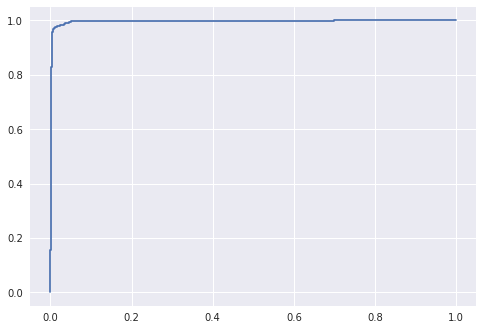

In [10]:
fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
plt.plot(fpr, tpr);